In [25]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
from keras. layers import MaxPooling2D
from keras.layers import Dense
import numpy as np

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(34,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=130,activation='relu'))
model.add(Dense(units=115,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
from tensorflow import keras
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')


])

In [29]:
import tensorflow as tf
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(64,64,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))

In [30]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg_model = Sequential()
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(64,64,3))
base_model.trainable = False
vgg_model.add(base_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(1, activation='sigmoid'))

In [31]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg19_model=Sequential()
vgg = VGG19(weights="imagenet", include_top=False, input_shape=(64,64,3))
vgg.trainable = False
vgg19_model.add(vgg)
vgg19_model.add(Flatten())
vgg19_model.add(Dense(512, activation='relu'))
vgg19_model.add(Dense(1, activation='sigmoid'))

In [32]:
model.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.4,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [34]:
training_set =train_datagen.flow_from_directory('/content/drive/MyDrive/archive (14)/Dataset/Train',target_size = (64, 64),batch_size = 8,class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/archive (14)/Dataset/Test',target_size = (64, 64),batch_size = 8,class_mode = 'binary')

Found 1453 images belonging to 2 classes.
Found 346 images belonging to 2 classes.


In [35]:
model.fit(training_set,steps_per_epoch = 20,epochs = 100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 419ms/step - accuracy: 0.4993 - loss: 0.7976
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 323ms/step - accuracy: 0.4999 - loss: 0.7321
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 381ms/step - accuracy: 0.5830 - loss: 0.7657
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 327ms/step - accuracy: 0.5094 - loss: 0.7799
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 353ms/step - accuracy: 0.5478 - loss: 0.7305
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 374ms/step - accuracy: 0.5064 - loss: 0.8098
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 321ms/step - accuracy: 0.5862 - loss: 0.7443
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 421ms/step - accuracy: 0.6335 - loss: 0.6424
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 263ms/step - accuracy: 0.5934 - loss: 0.7396
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4938 - loss: 0.6907  
Epoch 11/100


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 313ms/step - accuracy: 0.5022 - loss: 0.7874
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 420ms/step - accuracy: 0.6329 - loss: 0.7029
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 312ms/step - accuracy: 0.4871 - loss: 0.7365
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 369ms/step - accuracy: 0.5151 - loss: 0.7532
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 335ms/step - accuracy: 0.5129 - loss: 0.7486
Epoch 16/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 393ms/step - accuracy: 0.5320 - loss: 0.8564
Epoch 17/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 480ms/step - accuracy: 0.5106 - loss: 0.8126
Epoch 18/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 368ms/step - accuracy: 0.5097 - loss: 0.8140
Epoch 19/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 297ms/step - accuracy: 0.5215 - loss: 0.7697
Epoch 20/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 0.7537  
Epoch 21/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 346ms/step - accuracy: 0.5816 - loss: 0.7613
Epoch 22/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 

In [36]:
test_loss, test_acc = model.evaluate(test_set, verbose=2)

print("\n\n")
print("Test Loss: \t", test_loss, "\n")
print("Test accuracy: \t", test_acc, "\n")

44/44 - 11s - 258ms/step - accuracy: 0.5549 - loss: 0.7220



Test Loss: 	 0.7220160961151123 

Test accuracy: 	 0.5549132823944092 



In [37]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image
test_image =image.load_img('/content/drive/MyDrive/archive (14)/Dataset/Test/Kidney_stone/1.3.46.670589.33.1.63713381201930036800001.4827992095518766847.png',target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = resnet_model.predict(test_image)
print(result)
training_set.class_indices
if result[0][0] > 0.5:
  result[0][0] = 1
else:
  result[0][0] = 0
if result[0][0] == 1:
  prediction = 'KIDNEY STONES'
else:
  prediction = 'NORMAL'
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
[[0.9088129]]
KIDNEY STONES


In [38]:
pip install lime


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

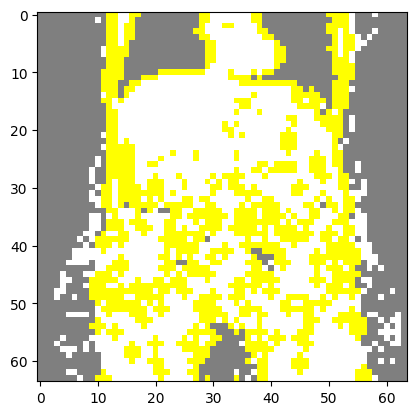

In [42]:
import numpy as np
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

# Create a LIME image explainer
explainer = lime_image.LimeImageExplainer()

# Load the image you want to explain
test_image = image.load_img('/content/drive/MyDrive/archive (14)/Dataset/Test/Kidney_stone/1.3.46.670589.33.1.63713381201930036800001.4827992095518766847.png', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Explain the model's prediction on this image
explanation = explainer.explain_instance(test_image[0].astype('double'),
                                         resnet_model.predict,
                                         top_labels=1,
                                         hide_color=0,
                                         num_samples=1000)

# Get the image and mask for the top prediction
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)

# Display the image with LIME explanation
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()


In [43]:
pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 12.1 MB/s eta 0:00:00


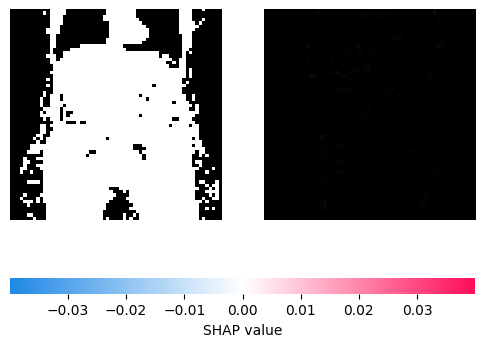

In [45]:
import shap
import numpy as np

# Extract some samples from the training set
train_images, _ = next(training_set)

# Initialize the SHAP explainer with the ResNet model
explainer = shap.GradientExplainer(resnet_model, train_images)

# Explain the prediction for your image
shap_values = explainer.shap_values(test_image)

# Plot the SHAP values on the image
shap.image_plot(shap_values, test_image)


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU, Reshape, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define the GAN model
def build_generator():
    model = Sequential()
    model.add(Dense(128, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(784, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model

def build_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Create and compile the models
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Training the GAN
def train_gan(epochs, batch_size=128):
    # Load and preprocess the dataset
    (X_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
    X_train = (X_train - 127.5) / 127.5
    X_train = np.expand_dims(X_train, axis=3)

    for epoch in range(epochs):
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_images = X_train[idx]
        noise = np.random.randn(batch_size, 100)
        fake_images = generator.predict(noise)

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))

        # Train the generator
        noise = np.random.randn(batch_size, 100)
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Discriminator Loss: {d_loss_real[0] + d_loss_fake[0]}, Generator Loss: {g_loss}")

train_gan(epochs=500)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
Epoch 0, Discriminator Loss: 0.8091810941696167, Generator Loss: [array(0.5172292, dtype=float32), array(0.5172292, dtype=float32), array(0.69921875, dtype=float32)]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━

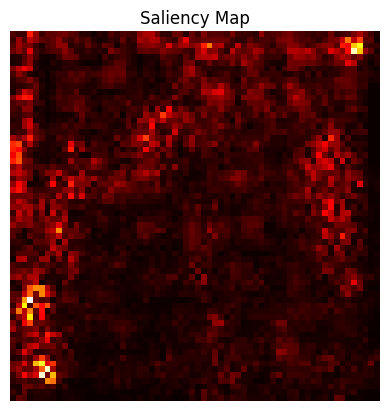

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50

# Define and compile your ResNet model
def create_resnet_model():
    model = tf.keras.Sequential()
    pretrained_model = ResNet50(include_top=False, input_shape=(64,64,3), pooling='avg', weights='imagenet')
    for layer in pretrained_model.layers:
        layer.trainable = False
    model.add(pretrained_model)
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the model
resnet_model = create_resnet_model()

# Load and preprocess the image
test_image_path = '/content/drive/MyDrive/archive (14)/Dataset/Test/Kidney_stone/1.3.46.670589.33.1.63713381201930036800001.4827992095518766847.png'
test_image = image.load_img(test_image_path, target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Compute saliency map
def compute_saliency_map(model, img_array):
    img_array = tf.convert_to_tensor(img_array)
    with tf.GradientTape() as tape:
        tape.watch(img_array)
        predictions = model(img_array)
        class_id = tf.argmax(predictions[0])
        class_output = predictions[0, class_id]
    grads = tape.gradient(class_output, img_array)
    saliency = tf.reduce_max(tf.abs(grads), axis=-1)
    return saliency.numpy()

saliency_map = compute_saliency_map(resnet_model, test_image)

# Display saliency map
plt.imshow(saliency_map[0], cmap='hot')
plt.axis('off')
plt.title('Saliency Map')
plt.show()

